In [1]:

import os, shutil

def data_yuklab_olish(saqlash_uchun_papka, data_nomi = "lentils"):

    data_nomlari = ["salaries", "exams", "college", "cars", "car_brands", "mall", "customers", "humanitarian", "apple_disease", "insects", "cars", "crop",
                    "rice_leaf_disease", "lentils", "brain", "fruits", "aeroscapes", "cardiac", "vehicles", "cloud", "skin_lesion", "comments", "3d_data"]

    assert data_nomi in data_nomlari, f"Mavjud bo'lgan dataset {data_nomlari} dan birini kiriting!"

    if data_nomi == "rice_leaf_disease": url = "kaggle datasets download -d killa92/rice-leaf-disease-classification-dataset"
    elif data_nomi == "lentils": url = "kaggle datasets download -d killa92/lentils-classification-dataset"
    elif data_nomi == "aeroscapes": url = "kaggle datasets download -d killa92/aerospaces-semantic-segmentation-dataset"
    elif data_nomi == "cardiac": url = "kaggle datasets download -d killa92/cardiac-semantic-segmentation-dataset"
    elif data_nomi == "brain": url = "kaggle datasets download -d killa92/brain-ct-tumor-classification-dataset"
    elif data_nomi == "fruits": url = "kaggle datasets download -d killa92/fruits-classification-dataset"
    elif data_nomi == "apple_disease": url = "kaggle datasets download -d killa92/apple-disease-dataset"
    elif data_nomi == "vehicles": url = "kaggle datasets download -d killa92/vehicle-detection-dataset"
    elif data_nomi == "cloud": url = "kaggle datasets download -d killa92/cloud-quality-images-classification-dataset"
    elif data_nomi == "insects": url = "kaggle datasets download -d killa92/arthropodia-semantic-segmentation-dataset"
    elif data_nomi == "cars": url = "kaggle datasets download -d killa92/car-detect-dataset"
    elif data_nomi == "skin_lesion": url = "kaggle datasets download -d killa92/skin-lesion-image-ham-classification"
    elif data_nomi == "crop": url = "kaggle datasets download -d killa92/crop-disease-image-classification-dataset"
    elif data_nomi == "comments": url = "kaggle datasets download -d killa92/comments-nlp-sentiment-analysis-dataset"
    elif data_nomi == "car_brands": url = "kaggle datasets download mohamedaziz15/cars-brands-in-egypt"
    elif data_nomi == "3d_data": url = "kaggle datasets download glxslzt/3cla-adni"

    # Dataset yuklab olinganligini tekshirish
    if os.path.isfile(f"{saqlash_uchun_papka}/{data_nomi}.csv") or os.path.isdir(f"{saqlash_uchun_papka}/{data_nomi}"): print(f"Dataset yuklab olingan. {saqlash_uchun_papka}/{data_nomi} papkasini ni tekshiring."); pass

    # Agar dataset yuklab olinmagan bo'lsa:
    else:
        # dataset nomini aniqlash
        ds_nomi = url.split("/")[-1]
        # data saqlanadigan yo'lakni belgilash
        full_path = f"{saqlash_uchun_papka}/{ds_nomi}"
        print(f"{data_nomi} dataset yuklanmoqda...")
        # Datasetni belgilangan yo'lakka yuklab olish
        os.system(f"{url} -p {full_path}")
        # Arxivdan chiqarib olish
        shutil.unpack_archive(f"{full_path}/{ds_nomi}.zip", f"{saqlash_uchun_papka}/{ds_nomi}")
        # Original arxiv faylni o'chirib tashlash
        os.remove(f"{full_path}/{ds_nomi}.zip")
        # Yuklab olingan datasetning nomini o'zgartirish
        os.rename(f"{saqlash_uchun_papka}/{ds_nomi}", f"{saqlash_uchun_papka}/{data_nomi}")
        print(f"Tanlangan dataset {saqlash_uchun_papka}/{data_nomi} papkasiga yuklab olindi!")

data_yuklab_olish(saqlash_uchun_papka = "datasets_leaf", data_nomi = "rice_leaf_disease")
data_path = "datasets_leaf/rice_leaf_disease"

rice_leaf_disease dataset yuklanmoqda...
Tanlangan dataset datasets_leaf/rice_leaf_disease papkasiga yuklab olindi!


# Data cleaning and labeling

In [2]:
from torch.utils.data import Dataset
from glob import glob
import os, random
from PIL import Image
import torch
classes ={}
volume_classes = {}
class Downloadit(Dataset):

    def __init__(self, path, pic_type=[".jpg", ".png", ".bmp"], transformations=None):
        super().__init__()
        global classes
        self.pic_path = glob(f"{path}/*/*/*{[n for n in pic_type]}")
        self.pic_type = pic_type
        self.transformations = transformations
        self.create_class()
        # print(classes)

    def __len__(self): return len(self.pic_path)

    def cls_name(self, image_path): return os.path.basename(os.path.dirname(image_path))

    # def get_pos_neg_im_paths(self, qry_label): pass
        # pos_im_paths = [im_path for im_path in self.pic_path if qry_label == self.cls_name(im_path)] # qry_label = BMW; only BMW
        # neg_im_paths = [im_path for im_path in self.pic_path if qry_label != self.cls_name(im_path)] # qry_label = BWM;
        # pos_rand_int = random.randint(a = 0, b = len(pos_im_paths) - 1)
        # neg_rand_int = random.randint(a = 0, b = len(neg_im_paths) - 1)
        # return pos_im_paths[pos_rand_int], neg_im_paths[neg_rand_int]


    def create_class(self):
      global classes
      global volume_classes
      idx=0
      vl = 1

      for one_pic_path in self.pic_path:
        class_name = self.cls_name(one_pic_path)

        if not class_name in classes.keys():
          classes[class_name] = idx
          idx +=1

        if not class_name in volume_classes.keys():
          volume_classes[class_name] = len(glob(f"{os.path.dirname(one_pic_path)}/*{[n for n in self.pic_type]}"))




    def id_cls(self, pic_path_1):
      name = self.cls_name(pic_path_1)
      javob = classes[name]

      return javob
    def read_im(self, path):

        im = Image.open(path)
        if im.mode == "P" and "transparency" in im.info: im = im.convert("RGBA")
        im = im.convert("RGB")

        return im

    def __getitem__(self, idx):
        pic_path_1 = self.pic_path[idx]
        qry_label = self.cls_name(pic_path_1)
        # pos_im, neg_im = self.get_pos_neg_im_paths(qry_label)
        #gts
        # print(neg_im)
        # print(self.id_cls(neg_im))
        # neg_gt = torch.tensor(self.id_cls(neg_im))
        # print(neg_gt)
        qry_gt = torch.tensor(self.id_cls(pic_path_1))
        #images
        # pos_im = self.read_im(pos_im)
        # neg_im = self.read_im(neg_im)
        qry_im = self.read_im(pic_path_1)

        if self.transformations:
            # pos_im = self.transformations(pos_im)
            # neg_im = self.transformations(neg_im)
            qry_im = self.transformations(qry_im)


        # data = {}

        # data["qry_im"] = qry_im
        # data["qry_gt"] = qry_gt
        # data["pos_im"] = pos_im
        # data["neg_im"] = neg_im
        # data["neg_gt"] = neg_gt

        return qry_im, qry_gt


In [3]:
ds = Downloadit(data_path)


# Dataset Class Imbalance Analysis

<ipython-input-4-75a11f897d51>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(klass_nomlari, rotation = 60)


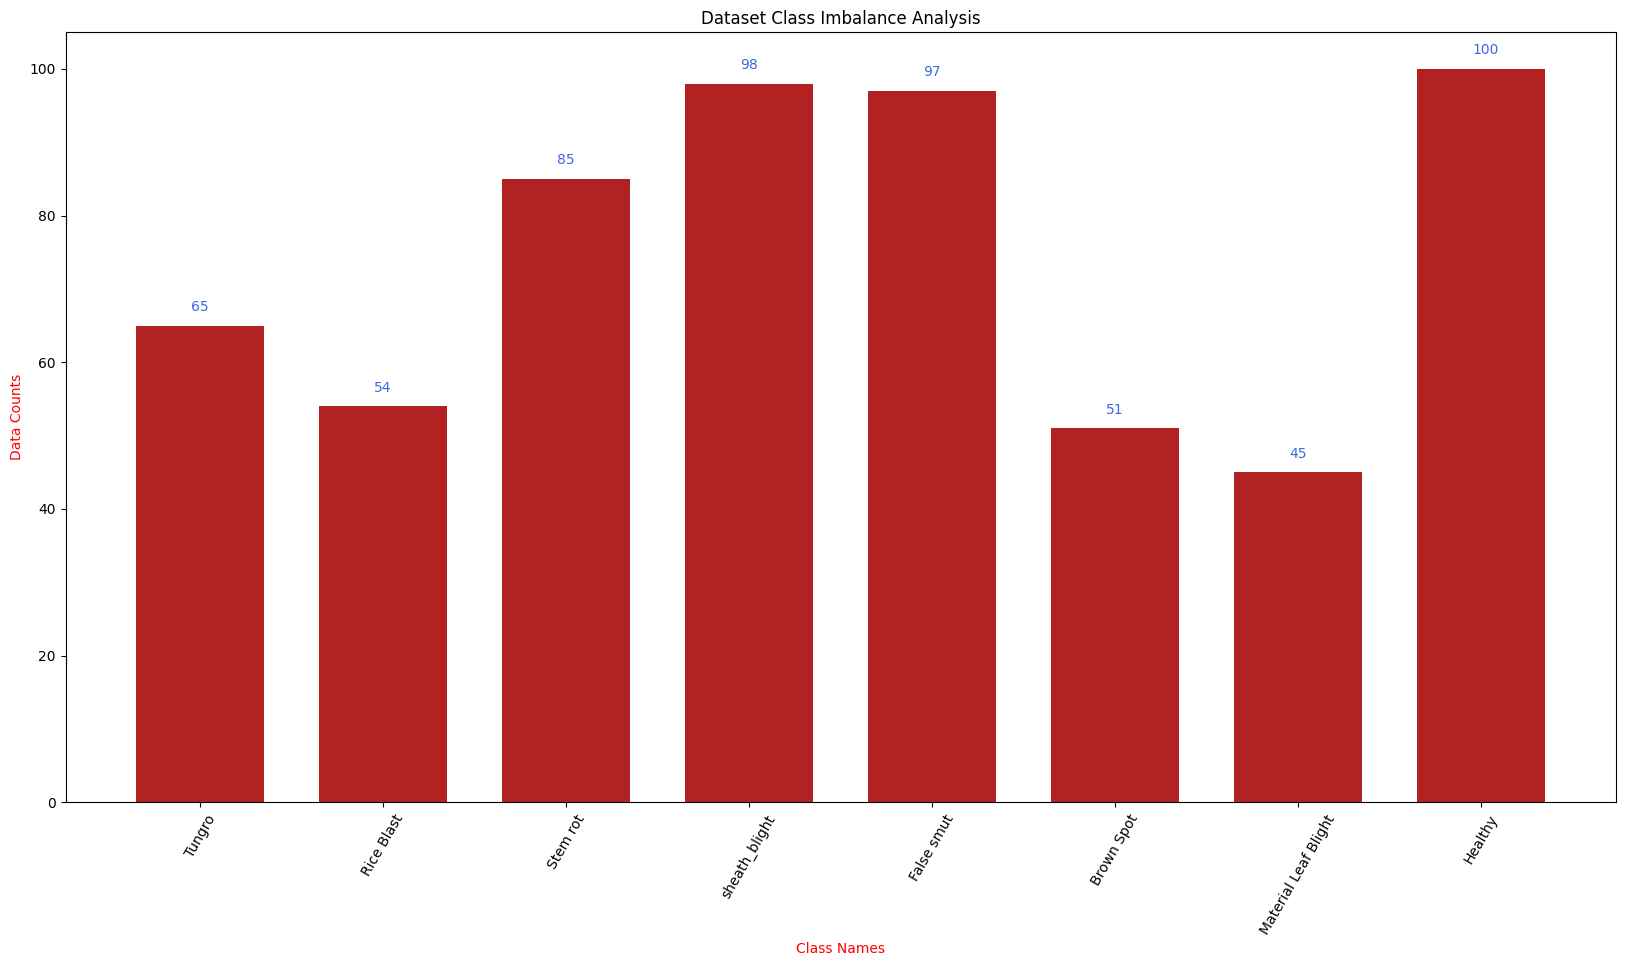

In [4]:
from matplotlib import pyplot as plt
import numpy as np
def data_analysis(data_volumes):

    width, text_width = 0.7, 0.05
    text_height = 2
    klass_nomlari = list(data_volumes.keys()); counts = list(data_volumes.values())

    fig, ax = plt.subplots(figsize = (20, 10))
    indices = np.arange(len(counts))

    ax.bar(indices, counts, width, color = "firebrick")
    ax.set_xlabel("Class Names", color = "red")
    ax.set_xticklabels(klass_nomlari, rotation = 60)
    ax.set(xticks = indices, xticklabels = klass_nomlari)
    ax.set_ylabel("Data Counts", color = "red")
    ax.set_title(f"Dataset Class Imbalance Analysis")

    for i, v in enumerate(counts): ax.text(i - text_width, v + text_height, str(v), color = "royalblue")

data_analysis(volume_classes)

# splitting the data and creating dataloaders

In [5]:
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as T

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.225, 0.224]
pic_size = 224
bs = 8
tfs = T.Compose([T.Resize((pic_size, pic_size)), T.ToTensor(), T.Normalize(mean = mean, std = std)])

ds = Downloadit(data_path, transformations = tfs )

train_size = int(0.8 * len(ds))
val_size = (len(ds) - train_size)//2
test_size = len(ds) - train_size - val_size

train_ds, val_ds, test_ds = torch.utils.data.random_split(ds, [train_size, val_size, test_size])

train_dl , val_dl, test_dl = DataLoader(train_ds, batch_size = bs, shuffle = True), DataLoader(val_ds, batch_size = bs, shuffle = False), DataLoader(test_ds, batch_size =1, shuffle = False)

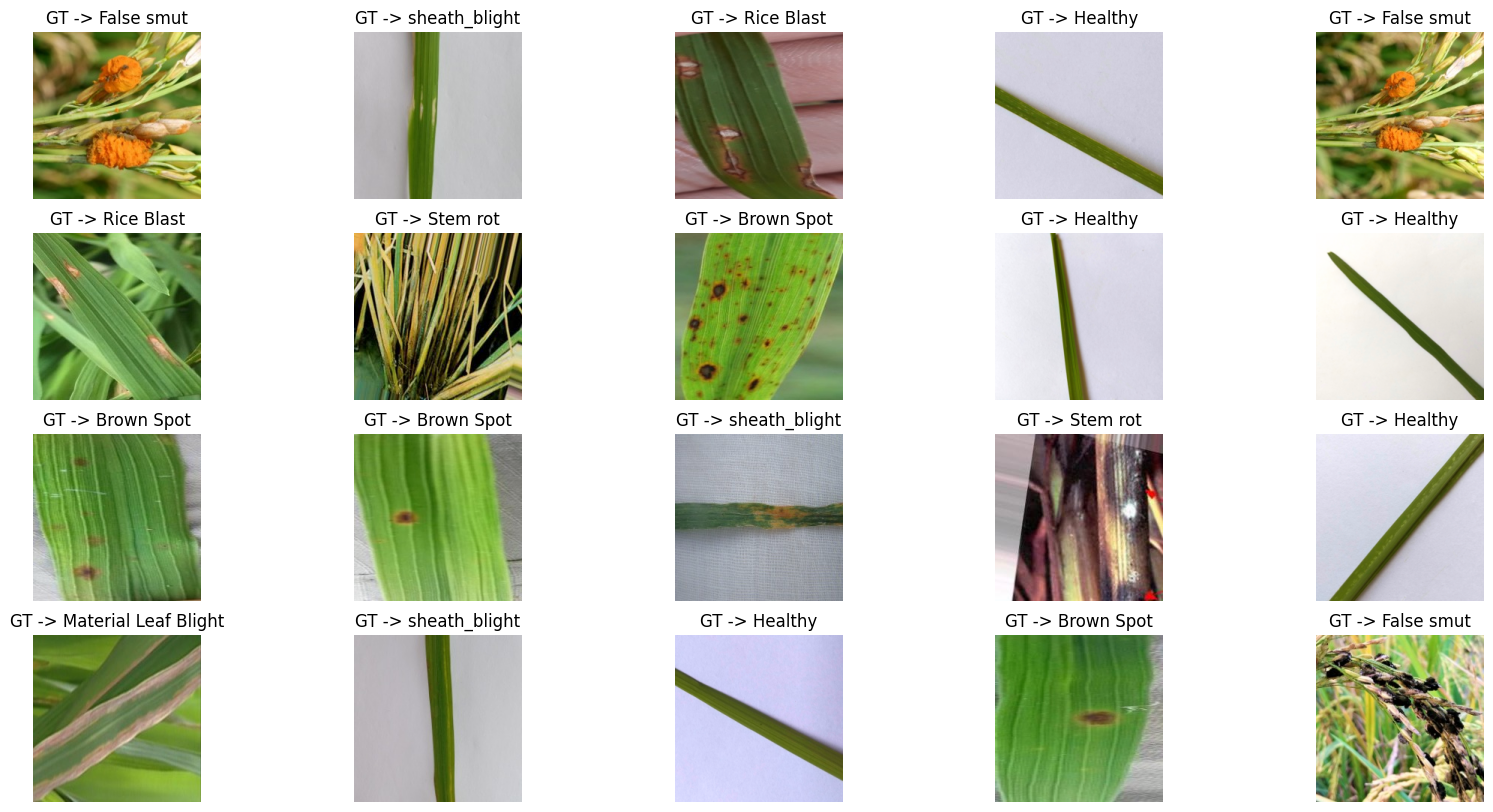

In [6]:
import random
from matplotlib import pyplot as plt

def tensor_2_im(t, t_type = "rgb"):

    gray_tfs = T.Compose([T.Normalize(mean = [ 0.], std = [1/0.5]), T.Normalize(mean = [-0.5], std = [1])])
    rgb_tfs = T.Compose([T.Normalize(mean = [ 0., 0., 0. ], std = [ 1/0.229, 1/0.224, 1/0.225 ]), T.Normalize(mean = [ -0.485, -0.456, -0.406 ], std = [ 1., 1., 1. ])])

    invTrans = gray_tfs if t_type == "gray" else rgb_tfs

    return (invTrans(t) * 255).detach().squeeze().cpu().permute(1,2,0).numpy().astype(np.uint8) if t_type == "gray" else (invTrans(t) * 255).detach().cpu().permute(1,2,0).numpy().astype(np.uint8)

def visualize(data, n_ims, rows, cmap = None, cls_names = None):

    assert cmap in ["rgb", "gray"], "Rasmni oq-qora yoki rangli ekanini aniqlashtirib bering!"
    if cmap == "rgb": cmap = "viridis"

    plt.figure(figsize = (20, 10))
    indekslar = [random.randint(0, len(data) - 1) for _ in range(n_ims)]
    for idx, indeks in enumerate(indekslar):

        im, gt = data[indeks]
        # Start plot
        plt.subplot(rows, n_ims // rows, idx + 1)
        if cmap: plt.imshow(tensor_2_im(im, cmap), cmap=cmap)
        else: plt.imshow(tensor_2_im(im))
        plt.axis('off')
        if cls_names is not None: plt.title(f"GT -> {cls_names[int(gt)]}")
        else: plt.title(f"GT -> {gt}")

visualize(train_dl.dataset, 20, 4, "rgb", list(classes.keys()))

# Training and validation loop with pre-trained model

In [7]:
import time
import os
from tqdm import tqdm
import torch


def model_train(train_dl, model, loss_fn, opt, device):
  train_loss, train_acc = 0, 0
  model.to(device)
  model.train()

  for idx, batch in enumerate(tqdm(train_dl, desc = f"Train jarayoni...")):
    pics, gts = batch
    pics, gts = pics.to(device), gts.to(device)
    preds = model(pics)
    t_loss = loss_fn(preds, gts)
    opt.zero_grad()
    t_loss.backward()
    opt.step()
        #accuracy
    javoblar = torch.argmax(preds, dim=1)
    acc = (torch.sum(javoblar == gts).item()/len(gts))*100
    train_acc += acc/len(train_dl)
    train_loss += t_loss.item()/len(train_dl)
  return train_loss, train_acc

def model_val(val_dl, model, loss_fn, device):
  val_loss, val_acc_2 = 0, 0
  model.to(device)
  model.eval()
  with torch.no_grad():
      for idx, batch in enumerate(tqdm(val_dl, desc="Validation jarayoni...")):
          pics, gts = batch
          pics, gts = pics.to(device), gts.to(device)
          preds = model(pics)
          v_loss = loss_fn(preds, gts).item()
          val_loss += v_loss/len(val_dl)
          #accuracy

          javoblar_1 = torch.argmax(preds, dim=1)
          acc_2 = ((torch.sum(javoblar_1 == gts ).item()/len(gts))*100)/len(val_dl)
          val_acc_2 += acc_2

  return val_loss, val_acc_2

def do_train(train_dl, val_dl, model, loss_fn, opt, device, epochs, patience, model_dir = "best_model_dir"):
  os.makedirs(model_dir, exist_ok=True)
  best_acc = 0
  best_train_acc = 0
  patience_counter = 0
  train_losses, val_losses = [], []
  train_acces, val_acces = [], []
  start_time = time.time()
  for epoch in range(epochs):
    #if epoch == 1: break
    print(f"\nEpoch {epoch + 1}/{epochs}")
    train_loss, train_acc = model_train(train_dl, model, loss_fn, opt, device)
    val_loss, val_acc = model_val(val_dl, model, loss_fn, device)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_acces.append(train_acc)
    val_acces.append(val_acc)
    if val_acc > best_acc and train_acc > best_train_acc:
      best_train_acc = train_acc
      best_acc = val_acc
      patience_counter = 0
      torch.save(model.state_dict(), os.path.join(model_dir, "best_model.pt"))
      print()

    else: patience_counter += 1
    if patience_counter == patience:
      print(f"{best_acc:.2f}% accuracyga erishgan eng yaxshi model saqlandi.")
      print(f"AI model accuracy si so'nggi {patience} epoc davomida ko'tarilmagani uchun train jarayoni yakullandi ")
      break
    print(f"Train Loss -> {train_loss:.4f}    | Train Accuracy -> {train_acc:.2f}%")
    print(f"Val Loss   -> {val_loss:.4f}    | Val Accuracy   -> {val_acc:.2f}%")

  end_time = time.time()
  print(f"\nTraining completed in {(end_time - start_time):.2f} seconds.")
  print(f"Best Validation Accuracy: {best_acc:.2f}%")
  return train_losses, val_losses, train_acces, val_acces, best_acc

In [8]:
import timm
import time
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

class_counts = torch.tensor(list(volume_classes.values()), dtype=torch.float)
# Normalization
weights = 1.0 / class_counts
weights = weights / weights.sum()
# GPU ishlashi uchun devicega o'tkazamiz
weights = weights.to(device)


model = timm.create_model(model_name = "rexnet_150", pretrained  = True, num_classes = len(classes))

opt = torch.optim.Adam(params = model.parameters(), lr = 3e-4)
loss_fn = torch.nn.CrossEntropyLoss(weight=weights)

train_losses, val_losses, train_acces, val_acces, m_best_acc = do_train(train_dl = train_dl, val_dl =val_dl, model = model, loss_fn = loss_fn, opt = opt, device = device, epochs = 100 , patience = 5)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/39.2M [00:00<?, ?B/s]


Epoch 1/100


Validation jarayoni...: 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]



Train Loss -> 1.2238    | Train Accuracy -> 67.50%
Val Loss   -> 0.2538    | Val Accuracy   -> 89.58%

Epoch 2/100


Validation jarayoni...: 100%|██████████| 8/8 [00:01<00:00,  4.80it/s]



Train Loss -> 0.1636    | Train Accuracy -> 95.21%
Val Loss   -> 0.2964    | Val Accuracy   -> 92.19%

Epoch 3/100


Validation jarayoni...: 100%|██████████| 8/8 [00:02<00:00,  3.12it/s]



Train Loss -> 0.0557    | Train Accuracy -> 97.92%
Val Loss   -> 0.0973    | Val Accuracy   -> 96.88%

Epoch 4/100


Validation jarayoni...: 100%|██████████| 8/8 [00:01<00:00,  4.97it/s]



Train Loss -> 0.0644    | Train Accuracy -> 98.13%
Val Loss   -> 0.0694    | Val Accuracy   -> 98.44%

Epoch 5/100


Validation jarayoni...: 100%|██████████| 8/8 [00:01<00:00,  4.78it/s]


Train Loss -> 0.1300    | Train Accuracy -> 96.46%
Val Loss   -> 0.1176    | Val Accuracy   -> 98.44%

Epoch 6/100


Validation jarayoni...: 100%|██████████| 8/8 [00:01<00:00,  4.81it/s]


Train Loss -> 0.0881    | Train Accuracy -> 97.29%
Val Loss   -> 0.1820    | Val Accuracy   -> 93.75%

Epoch 7/100


Validation jarayoni...: 100%|██████████| 8/8 [00:01<00:00,  4.91it/s]


Train Loss -> 0.1347    | Train Accuracy -> 95.83%
Val Loss   -> 0.1437    | Val Accuracy   -> 96.88%

Epoch 8/100


Validation jarayoni...: 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]


Train Loss -> 0.0389    | Train Accuracy -> 98.33%
Val Loss   -> 0.2708    | Val Accuracy   -> 95.31%

Epoch 9/100


Validation jarayoni...: 100%|██████████| 8/8 [00:01<00:00,  4.61it/s]



Train Loss -> 0.0731    | Train Accuracy -> 98.33%
Val Loss   -> 0.0178    | Val Accuracy   -> 100.00%

Epoch 10/100


Validation jarayoni...: 100%|██████████| 8/8 [00:01<00:00,  4.77it/s]


Train Loss -> 0.0683    | Train Accuracy -> 98.13%
Val Loss   -> 0.0414    | Val Accuracy   -> 98.44%

Epoch 11/100


Validation jarayoni...: 100%|██████████| 8/8 [00:01<00:00,  4.72it/s]


Train Loss -> 0.1028    | Train Accuracy -> 96.88%
Val Loss   -> 0.0184    | Val Accuracy   -> 100.00%

Epoch 12/100


Validation jarayoni...: 100%|██████████| 8/8 [00:01<00:00,  4.72it/s]


Train Loss -> 0.0890    | Train Accuracy -> 97.08%
Val Loss   -> 0.0343    | Val Accuracy   -> 98.44%

Epoch 13/100


Validation jarayoni...: 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]


Train Loss -> 0.1190    | Train Accuracy -> 97.08%
Val Loss   -> 0.0202    | Val Accuracy   -> 98.44%

Epoch 14/100


Validation jarayoni...: 100%|██████████| 8/8 [00:01<00:00,  4.46it/s]

100.00% accuracyga erishgan eng yaxshi model saqlandi.
AI model accuracy si so'nggi 5 epoc davomida ko'tarilmagani uchun train jarayoni yakullandi 

Training completed in 217.01 seconds.
Best Validation Accuracy: 100.00%


# Inference

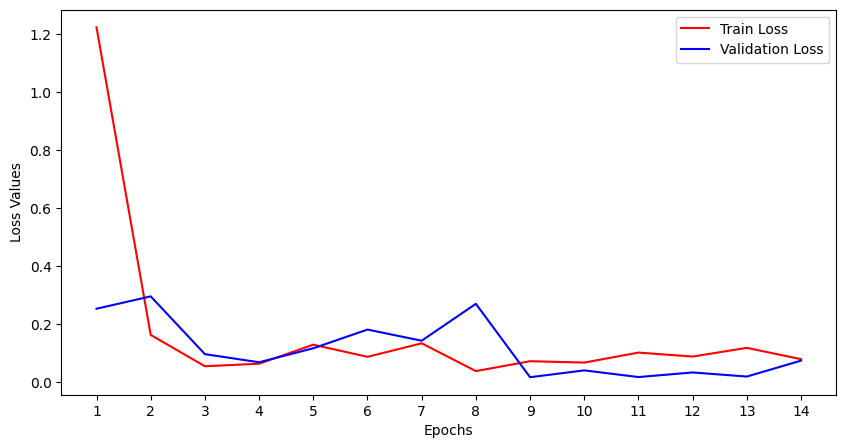

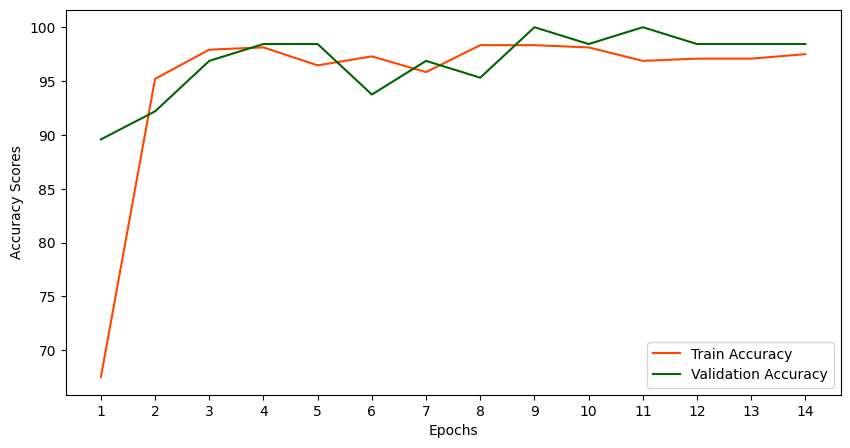

In [9]:
# learning curves
class PlotLearningCurves:

    def __init__(self, tr_losses, val_losses, tr_accs, val_accs):

        self.tr_losses, self.val_losses, self.tr_accs, self.val_accs = tr_losses, val_losses, tr_accs, val_accs

    def chizish(self, array_1, array_2, label_1, label_2, color_1, color_2):

        plt.plot(array_1, label = label_1, c = color_1); plt.plot(array_2, label = label_2, c = color_2)

    def chizmani_yaratish(self): plt.figure(figsize = (10, 5))

    def bezash(self, ylabel, xlabel = "Epochs"):

        plt.xlabel(xlabel); plt.ylabel(ylabel)
        plt.xticks(ticks = np.arange(len(self.tr_accs)), labels = [i for i in range(1, len(self.tr_accs) + 1)])
        plt.legend(); plt.show()

    def korsatish(self):

        # Figure 1
        self.chizmani_yaratish()
        self.chizish(array_1 = self.tr_losses, array_2 = self.val_losses, label_1 = "Train Loss", label_2 = "Validation Loss", color_1 = "red", color_2 = "blue"); self.bezash(ylabel = "Loss Values")

        # Figure 2
        self.chizmani_yaratish()
        self.chizish(array_1 = self.tr_accs, array_2 = self.val_accs, label_1 = "Train Accuracy", label_2 = "Validation Accuracy", color_1 = "orangered", color_2 = "darkgreen"); self.bezash(ylabel = "Accuracy Scores")



PlotLearningCurves(tr_losses=train_losses, val_losses=val_losses, tr_accs=train_acces, val_accs=val_acces).korsatish()


<ipython-input-12-dae92da54307>:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f"{save_dir}/best_model.pt"))
60it [00:02, 28.32it/s]


Accuracy of the model on the test data -> 0.967


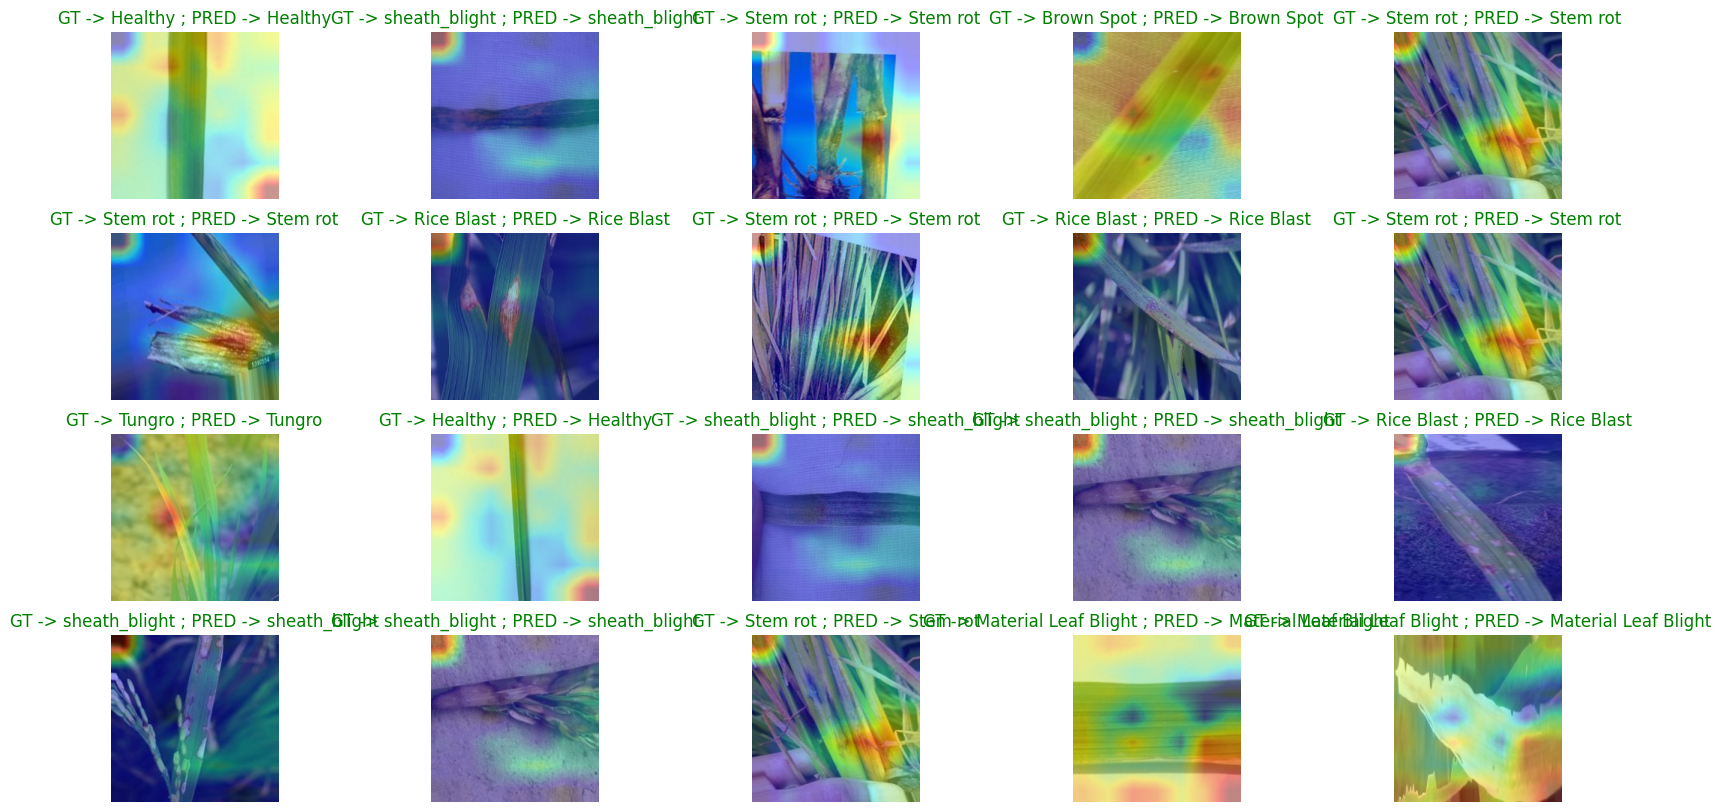

In [12]:
import cv2
class SaveFeatures():

    """ Extract pretrained activations"""
    features = None
    def __init__(self, m):
        self.hook = m.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output):
        self.features = ((output.cpu()).data).numpy()
    def remove(self): self.hook.remove()

def getCAM(conv_fs, linear_weights, class_idx):

    bs, chs, h, w = conv_fs.shape
    cam = linear_weights[class_idx].dot(conv_fs[0,:, :, ].reshape((chs, h * w)))
    cam = cam.reshape(h, w)

    return (cam - np.min(cam)) / np.max(cam)

def inference(model, device, test_dl, num_ims, row, final_conv, fc_params, cls_names = None):

    weight, acc = np.squeeze(fc_params[0].cpu().data.numpy()), 0
    activated_features = SaveFeatures(final_conv)
    preds, images, lbls = [], [], []
    for idx, batch in tqdm(enumerate(test_dl)):
        im, gt = batch
        im, gt = im.to(device), gt.to(device)
        pred_class = torch.argmax(model(im), dim = 1)
        acc += (pred_class == gt).sum().item()
        images.append(im)
        preds.append(pred_class.item())
        lbls.append(gt.item())

    print(f"Accuracy of the model on the test data -> {(acc / len(test_dl.dataset)):.3f}")

    plt.figure(figsize = (20, 10))
    indekslar = [random.randint(0, len(images) - 1) for _ in range(num_ims)]

    for idx, indeks in enumerate(indekslar):

        im = images[indeks].squeeze()
        pred_idx = preds[indeks]
        heatmap = getCAM(activated_features.features, weight, pred_idx)

        # Start plot
        plt.subplot(row, num_ims // row, idx + 1)
        plt.imshow(tensor_2_im(im), cmap = "gray"); plt.axis("off")
        plt.imshow(cv2.resize(heatmap, (im_size, im_size), interpolation=cv2.INTER_LINEAR), alpha=0.4, cmap='jet'); plt.axis("off")

        if cls_names is not None: plt.title(f"GT -> {cls_names[int(lbls[indeks])]} ; PRED -> {cls_names[int(preds[indeks])]}", color=("green" if {cls_names[int(lbls[indeks])]} == {cls_names[int(preds[indeks])]} else "red"))
        else: plt.title(f"GT -> {gt} ; PRED -> {pred_idx}")

model = timm.create_model(model_name = "rexnet_150", pretrained = False, num_classes = len(classes))
save_dir = "best_model_dir"
im_size = 224
model.load_state_dict(torch.load(f"{save_dir}/best_model.pt"))
model.eval()
final_conv, fc_params = model.features[-1], list(model.head.fc.parameters())
inference(model = model.to(device), device = device, test_dl = test_dl, num_ims = 20, row = 4, cls_names = list(classes.keys()), final_conv = final_conv, fc_params = fc_params)